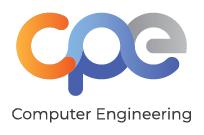

# CPE111/ISY202
# Session7: Number Theory and Cryptography
## Topic
* Prime number
* Factorization
* GCD
* Cryptography

---

### Representations of Integers
* __Decimal__ or __base = 10__ <br>
    In the modern world, we use decimal, or base 10, notation to represent integers. <br>
    The ancient Mayans used base 20 and the ancient Babylonians used base 60. <br>

* __Binary__ or __base = 2__ <br>
    Most computers represent integers and do arithmetic with binary (base 2) expansions of integers. In these expansions, the only digits used are 0 and 1 <br>

* __Octal or base = 8__ <br>
    The octal (base 8) uses the digits {0,1,2,3,4,5,6,7}

* __Hexadecimal or base 16__ <br>
    The hexadecimal expansion needs 16 digits, but our decimal system provides only 10. So letters are used for the additional symbols. The hexadecimal system uses the digits {0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F}. The letters A through F represent the decimal numbers 10 through 15.

In [40]:
# Print the representations of Integers in various base (10, 2, 8, 16)
def print_number_table():
    print(f"{'Decimal':<15}{'Binary':<15}{'Octal':<15}{'Hexadecimal':<15}")
    print("-" * 60)

    for i in range(0, 31):
        binary_represent = bin(i)[2:]
        octal_represent = oct(i)[2:]
        hex_represent = hex(i)[2:].upper()

        print(f"{i:<15}{binary_represent:<15}{octal_represent:<15}{hex_represent:<15}")

# Print the number table
print_number_table()


Decimal        Binary         Octal          Hexadecimal    
------------------------------------------------------------
0              0              0              0              
1              1              1              1              
2              10             2              2              
3              11             3              3              
4              100            4              4              
5              101            5              5              
6              110            6              6              
7              111            7              7              
8              1000           10             8              
9              1001           11             9              
10             1010           12             A              
11             1011           13             B              
12             1100           14             C              
13             1101           15             D              
14             1110     

### Division Algorithm
Division algorithm: if $a$ is an integer and $d$ a positive integer, then there are unique integers $q$ and $r$, with $0 \le r < d$, such that $a = dq + r$ <br>

* $d$ is called the divisor
* $a$ is called the dividend
* $q$ is called the quatient
* $r$ is called the remainder

In [41]:
a = 100
d = 7
q,r = divmod(a,d)
print(q)
print(r)

14
2


### Modulo

In [42]:
# Cycling through values using modulo
# ค่าไม่ถูกนับเกินค่า modulus
for i in range(1, 20):
    print(i % 3)

1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1


---

## Primes <br>
A positive integer p greater than 1 is called prime if the only positive factors of p are 1 and p. A positive integer that is greater than 1 and is not prime is called composite

Every positive integer greater than 1 can be written uniquely as a prime or as the product of two or more primes where the prime factors are written in order of nondecreasing size

In [43]:
# Example of the code for Check whether it is a prime number or not
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

In [44]:
a = 3
is_prime(a)

True

---

### `Practice#1` Seive of Eratosthenes Algorithm (ตาข่าย)
### from pesudo code try to code

__Algorithm__ Seive_of_Eratosthenes <br>
__Input__: Integer $n \ge 2$ <br>
__Output__: List of primes less or equal to $n$ <br>

__for__ $p$ = 2 to $n$ __do__ <br>
&nbsp;&nbsp;&nbsp; $A[p] = p$ <br>
__for__ $p$ = 2 to $\lfloor \sqrt{n} \rfloor$ __do__ <br>
&nbsp;&nbsp;&nbsp; __if__ $A[p] \ne 0$ __then__ # $p$ _hasn't been previously eliminated from the list_ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $j = p \times p$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; __while__ $j \ge n$ __do__ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $A[j] = 0 $ # _Mark element as eliminated_ <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $j = j + p $ 

In [45]:
# หาจำนวนเฉพาะ ตั้งแต่ 2 จนกระทั่งถึง n แล้วสร้างเป็น set
# sqrt(n) คือค่าน้อยที่สุดที่จะเช็คว่าเป็น Prime Number
import math

def seives_of_eratosthenes(n):
    A = [i for i in range(n+1)]
    for p in range(2,int(math.sqrt(n))+1):
        if A[p]:
            j = p*p
            while j <= n:
                A[j] = 0
                j += p
    return [i for i in A if i != 0 and i != 1]

In [46]:
print(seives_of_eratosthenes(21))

[2, 3, 5, 7, 11, 13, 17, 19]


---

## Prime factorization <br>
__Theroem__: Every positive integer greater than 1 can be written uniquely as a prime or as the product of two or more primes where the prime factors are written in order of nondecreasing size. <br>
<br>
__Examples__:
* $100 = 2 \cdot 2 \cdot 5 \cdot 5 = 2^2 \cdot 5^2$
* $641 = 641$
* $999 = 3 \cdot 3 \cdot 3 \cdot 37 = 3^3 \cdot 37 $
* $1024 = 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 \cdot 2 = 2^{10}$

---

In [47]:
def find_factors(number):
    factors = []
    for i in range(1, number + 1):
        if number % i == 0:
            factors.append(i)
    return factors

In [48]:
num = int(input("Enter a number: "))
result = find_factors(num) #หาตัวประกอบ
print(f"The factors of {num} are: {result}")

The factors of 35 are: [1, 5, 7, 35]


In [49]:
def prime_factors(number):
    factors = []
    for i in range(2, number + 1):
        while number % i == 0 and is_prime(i):
            factors.append(i)
            number //= i
    return factors

In [50]:
num = int(input("Enter a number: "))
prime_factors_list = prime_factors(num)
print(f"The the prime factors of {num} is: {prime_factors_list}")

The the prime factors of 15 is: [3, 5]


---

## Greatest Common Divisor <br> (ห.ร.ม.)
Let $a$ and $b$ be integers, not both zero. The largest integer $d$ such that $d | a$ and also $d | b$ is called the
greatest common divisor of $a$ and $b$. The greatest common divisor of $a$ and $b$ is denoted by __gcd(a,b)__ <br>
<br>
__Examples__:
* gcd(24,36) = 12
* gcd(10,24) = 2
* gcd(60,24) = 12
* gcd(60,0) = ?

---

### `Practice#2` Brute_Force_GCD
### from pesudo code try to code

__Algorithm__ Brute_Force_GCD(m, n) <br>
<br>
__Input__: Integer $m$ and Integer $n$ , which $m$ and $n$ is not zero <br>
__Output__: the GCD of $m$ and $n$ <br>
<br>
* __Step 1__: Assign the value of min{$m$,$n$} to $t$.
* __Step 2__: Divide $m$ by $t$. If the remainder is 0, go to __Step 3__; 
        Otherwise, go to __Step 4__
* __Step 3__: Divide $n$ by $t$. If the remainder is 0, __return__ $t$ and
        __stop__; Otherwise, go to __Step 4__
* __Step 4__: Decrease $t$ by 1 and go to __Step 2__

In [51]:
# Enter code here
def Brute_Force_GCD(m , n):
    if m == 0 or n == 0:
        return
    t = min(m,n)
    while t > 0:
        # Step 2
        if (m % t == 0):
            if (n % t == 0):
                return t
        t -= 1

In [52]:
print(Brute_Force_GCD(24,36))
print(Brute_Force_GCD(25,50))

12
25


---

### `Practice#3` Finding the GCD using Prime Factorizations
### from pesudo code try to code


__Algorithm__ Middle_School_GCD (m, n) <br>
<br>
__Input__: Integer $m$ and Integer $n$ <br>
__Output__: the GCD of $m$ and $n$ <br>
<br>
* __Step 1__: Find the __prime factorization__ of $m$
* __Step 2__: Find the __prime factorization__ of $n$
* __Step 3__: Find all the common prime factors
* __Step 4__: Compute the product of all the common prime factors and __return__ it as __gcd(m,n)__

In [53]:
# Enter code here
def Middle_School_GCD(m,n):
    if m <= 0 or n <= 0: return #error
    M_list = prime_factors(m)
    N_list = prime_factors(n)
    # print(M_list , N_list)
    # Common Prime Factors
    Common_list = []
    for number in M_list:
        if number in N_list:
            N_list.remove(number)
            Common_list.append(number)
            # print(Common_list , M_list , N_list)

    # Product all the common prime factors
    total = 1
    for i in Common_list:
        total *= i
    return total

In [54]:
print(Middle_School_GCD(24,36))

12


---

### `Practice#4` Euclid's algorithm
### from pesudo code try to code

__Algorithm__ Euclid_GCD (m, n) <br>
<br>
__Input__: Non-negative Integer $m$ and non-negative Integer $n$ , which $m$ and $n$ are not both zero , and $m \ge n$ <br>
__Output__: the GCD of $m$ and $n$ <br>
<br>
__while__ $n \ne 0$ __do__ <br>
&nbsp;&nbsp;&nbsp; $r := m$ mod $n$ <br>
&nbsp;&nbsp;&nbsp; $m := n$ <br>
&nbsp;&nbsp;&nbsp; $n := r$ <br>
__return__ $m$

In [55]:
# Enter code here
def Euclid_GCD(m,n):
    if m <= 0 or n <= 0: return
    while n != 0:
        r = m % n
        m = n
        n = r
    return m

In [56]:
print(Euclid_GCD(24,36))

12


---

### Check Digits: UPCs

<img src="image.png" alt="UPC" width="200"/>


The check digit is determined by the congruence: <br>
$3x_1 + x_2 + 3x_3 + x_4 + 3x_5 + x_6 +3x_7 + x_8 + 3x_9 + x_{10} + 3x_{11} + x_{12} \equiv 0 $ (mod 10)


In [57]:
def is_valid_upc(upc_code):
    if not upc_code.isdigit() or len(upc_code) != 12:
        return False

    # Calculate the check digit
    sum_odd = sum(int(upc_code[i]) for i in range(0, 11, 2))
    sum_even = sum(int(upc_code[i]) for i in range(1, 11, 2))
    total = 3 * sum_odd + sum_even
    check_digit = (10 - (total % 10)) % 10

    # Check if the calculated check digit matches the provided one
    return check_digit == int(upc_code[11])

In [58]:
upc_code = "036000291452"
result = is_valid_upc(upc_code)
print(f"The UPC {upc_code} is {'valid' if result else 'invalid'}.")

The UPC 036000291452 is valid.


---

### `Practice#5` Write a code to check the ISBN-10 

### Check Digits: ISBNs

![ISBN10](image-3.png)
<br>
Books are identified by an International Standard Book Number (ISBN-10), a 10 digit code. <br>

* The first 9 digits identify the language, the publisher, and the book. 
* The tenth digit is a check digit, which is determined by the following congruence <br>
<br>
$$x_{10} \equiv \sum_{i=1}^9 ix_i (mod 11) $$
<br>

* if the $x_{10}$ = 10 then use 'X' instead

In [59]:
# Enter code
def ISBN_Check(series_number):
    total = 0
    for i in range(9):
        total += (i+1) * int(series_number[i])
    
    total = total % 11
    # ที่เช็คเป็น String เพราะ ถ้าในกรณีที่หลัก 10 เป็น X มันจะไม่สามารถแปลงเป็น int ได้
    if series_number[9] == str(total):
        result = "The ISBN " + str(series_number) + " is valid"
        return result
    elif series_number[9] == "X" and total == 10:
        result = "THE ISBN " + str(series_number) + " is valid"
        return result
    else:
        result = "The ISBN " + str(series_number) + " is invalid"
        return result

Check for these following code which is valid ISBN-10 code

![Alt text](image-4.png)

In [60]:
# Valid or Invalid?
isbn_code = "0198526636"
print(ISBN_Check(isbn_code))

The ISBN 0198526636 is valid


![Alt text](image-5.png)

In [61]:
# Valid or Invalid?
isbn_code_2 = "8175257660"
print(ISBN_Check(isbn_code_2))

The ISBN 8175257660 is valid


![Alt text](image-6.png)

In [62]:
# Valid or Invalid? 
isbn_code_3 = "0863815804"
print(ISBN_Check(isbn_code_3))

The ISBN 0863815804 is valid


In [63]:
isbn_code_4 = "086243680X"
print(ISBN_Check(isbn_code_4))

THE ISBN 086243680X is valid


---

## Caecae Cipher
The Caesar cipher is one of a family of ciphers called __shift ciphers__. Letters can be shifted by an integer $k$, with 3 being just one possibility. <br>

The __encryption function__ is
$$ f(p) = (p + k) mod 26 $$

<br>

and the __decryption function__ is
$$ f^{−1}(p) = (p−k) mod 26 $$

The integer k is called a key.

In [64]:
def caesar_encrypt(text, shift):
    ciphered_text = ""
    
    for char in text:
        if char.isalpha():
            # Determine whether the character is uppercase or lowercase
            is_upper = char.isupper()
            # Apply the Caesar Cipher shift
            encrypted_char = chr(((ord(char) - ord('A' if is_upper else 'a') + shift) % 26) + ord('A' if is_upper else 'a'))
            ciphered_text += encrypted_char
        else:
            # If the character is not a letter, keep it unchanged
            ciphered_text += char

    return ciphered_text

In [65]:
plaintext = "Discrete Mathematic, Data Stucture and Algorithm"
shift_value = 3
ciphered_text = caesar_encrypt(plaintext, shift_value)
print(f"Plaintext: {plaintext}")
print(f"Ciphertext: {ciphered_text}")

Plaintext: Discrete Mathematic, Data Stucture and Algorithm
Ciphertext: Glvfuhwh Pdwkhpdwlf, Gdwd Vwxfwxuh dqg Dojrulwkp


### `Practice#6` Write a code to decrypt the Caesar cipher

In [66]:
# code here
def caesar_decrypt(ciphtertext, shift):
    plaintext = ""

    for char in ciphtertext:
        if char.isalpha():
            # Determine whether the character is uppercase or lowercase
            is_upper = char.isupper()
            # Apply the Caesar Cipher shift
            decrypted_char = chr(((ord(char) - ord('A' if is_upper else 'a') - shift) % 26) + ord('A' if is_upper else 'a'))
            plaintext += decrypted_char
        
        else:
            plaintext += char


    return plaintext

### Then try to decrypt these ciphered text (try to guess the key for each encryption) <br>

1. Mjcj rb j wnf xru
2. Byanjm uxen nenahfqnan hxd px
3. Lizsvmaa kivvwb lzqdm wcb lizsvmaa: wvtg tqopb kiv lw bpib

__hint__: key is the range of 1 to 15


### Text 1

In [67]:
text = "Mjcj rb j wnf xru"

for key in range(1,16):
    print(caesar_decrypt(text,key))

Libi qa i vme wqt
Khah pz h uld vps
Jgzg oy g tkc uor
Ifyf nx f sjb tnq
Hexe mw e ria smp
Gdwd lv d qhz rlo
Fcvc ku c pgy qkn
Ebub jt b ofx pjm
Data is a new oil
Czsz hr z mdv nhk
Byry gq y lcu mgj
Axqx fp x kbt lfi
Zwpw eo w jas keh
Yvov dn v izr jdg
Xunu cm u hyq icf


#### In conclusion, The Shift Key is 9 and the real text is "Data is a new oil"

### Text 2

In [68]:
text2 = "Byanjm uxen nenahfqnan hxd px"

for key in range(1,16):
    print(caesar_decrypt(text2,key))

Axzmil twdm mdmzgepmzm gwc ow
Zwylhk svcl lclyfdolyl fvb nv
Yvxkgj rubk kbkxecnkxk eua mu
Xuwjfi qtaj jajwdbmjwj dtz lt
Wtvieh pszi izivcalivi csy ks
Vsuhdg oryh hyhubzkhuh brx jr
Urtgcf nqxg gxgtayjgtg aqw iq
Tqsfbe mpwf fwfszxifsf zpv hp
Spread love everywhere you go
Roqdzc knud dudqxvgdqd xnt fn
Qnpcyb jmtc ctcpwufcpc wms em
Pmobxa ilsb bsbovtebob vlr dl
Olnawz hkra aranusdana ukq ck
Nkmzvy gjqz zqzmtrczmz tjp bj
Mjlyux fipy ypylsqbyly sio ai


#### In conclusion, The Shift Key is 9 and the real text is "Spread love everywhere you go"

### Text 3

In [69]:
text3 = "Lizsvmaa kivvwb lzqdm wcb lizsvmaa: wvtg tqopb kiv lw bpib"

for key in range(1,16):
    print(caesar_decrypt(text3,key))

Khyrulzz jhuuva kypcl vba khyrulzz: vusf spnoa jhu kv aoha
Jgxqtkyy igttuz jxobk uaz jgxqtkyy: utre romnz igt ju zngz
Ifwpsjxx hfssty iwnaj tzy ifwpsjxx: tsqd qnlmy hfs it ymfy
Hevoriww gerrsx hvmzi syx hevoriww: srpc pmklx ger hs xlex
Gdunqhvv fdqqrw gulyh rxw gdunqhvv: rqob oljkw fdq gr wkdw
Fctmpguu ecppqv ftkxg qwv fctmpguu: qpna nkijv ecp fq vjcv
Ebsloftt dboopu esjwf pvu ebsloftt: pomz mjhiu dbo ep uibu
Darkness cannot drive out darkness: only light can do that
Czqjmdrr bzmmns cqhud nts czqjmdrr: nmkx khfgs bzm cn sgzs
Bypilcqq ayllmr bpgtc msr bypilcqq: mljw jgefr ayl bm rfyr
Axohkbpp zxkklq aofsb lrq axohkbpp: lkiv ifdeq zxk al qexq
Zwngjaoo ywjjkp znera kqp zwngjaoo: kjhu hecdp ywj zk pdwp
Yvmfiznn xviijo ymdqz jpo yvmfiznn: jigt gdbco xvi yj ocvo
Xulehymm wuhhin xlcpy ion xulehymm: ihfs fcabn wuh xi nbun
Wtkdgxll vtgghm wkbox hnm wtkdgxll: hger ebzam vtg wh matm


#### In conclusion, The Shift Key is 8 and the real text is 
#### "Darkness cannot drive out darkness: only light can do that"

---

<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>